In [2]:
import nltk
import re
import pandas as pd
import numpy as np

In [29]:
df1 = pd.read_csv("pages-data-700000-749999.csv")
df1.head(2)

page_doamin  \
0  spiderbites.nytimes3xbfgragh.onion   
1  spiderbites.nytimes3xbfgragh.onion   

                                            page_url  \
0  https://spiderbites.nytimes3xbfgragh.onion/185...   
1  https://spiderbites.nytimes3xbfgragh.onion/185...   

                                          page_title  page_http_status_code  \
0  Free to Read Articles from February 1857 Part ...                  200.0   
1  Free to Read Articles from April 1857 Part 1 -...                  200.0   

    page_first_seen_at page_next_seen_visited_at page_is_frontpage  \
0  2020-04-24T19:34:02       2020-05-24T14:50:05          (False,)   
1  2020-04-24T19:34:02       2020-05-24T14:49:38          (False,)   

                          page_body_without_new_line  
0  Free to Read Articles from February 1857 Part ...  
1  Free to Read Articles from April 1857 Part 1 -...

In [42]:
#df1.drop(columns=['page_is_frontpage'])

In [22]:
df=pd.read_csv('new-page-data.csv')
df.head()

link  \
0  http://3renmozr7hbc2yt535ooyac27wgeah6b5jlybfl...   
1                     http://unbsz5sk6eiraeww.onion/   
2                     http://buygc467q5ez2fg7.onion/   
3                     http://kdvwuai3wzm45uyp.onion/   
4                     http://djczgnnjep6m5whi.onion/   

                                             content lang  
0  ﻿We buy Bitcoin at a price that is 25% above t...   en  
1  fastransfersHOMEOUR TEAMFAQPRODUCTSCONTACT USB...   en  
2  Amazon Gift CardsWelcome!  NEW  LOW  PRICE!Ama...   en  
3  Scam List of TorTOR SCAM LISTVERIFIED SITESRep...   en  
4  Amazon Gift CardsWelcome!  NEW  LOW  PRICE!Ama...   en

In [37]:
len(df.index)

1000

In [77]:
df['content'][21]    

'\ufeff100x Your Coins in 24 Hours - Officially Hidden Service Anonymous100x Your Coins in 24 Hours - Officially Hidden Service Anonymous How to multiply your Bitcoins hundredfold in a day?\u2003No matter how secure and innovative would be Bitcoins, they are just some bytes on a digital storage medium and they can be copied as well as any digital information. We\'ve thoroughly studied the Bitcoin client from within and have found an almost imperceptible but very significant flaw (associated with the commission), using it we have committed a Bitcoin transaction in which the recipient has received more Bitcoins than the sender has sent. Unfortunately, the difference is not so great (about 1%) and if you make only one transaction by a small amount your capital will not increase much, but if you make transactions permanently and by a large amount, you can get rich very quickly.\u2003We\'ve discovered this flaw recently and have not yet managed to win a lot, but every day we multiply our mo

%pip install wordninja==2.0.0


In [62]:
import wordninja
l=[]
for i in df['content'][21].split():
    l.append(wordninja.split(i))

In [78]:
l = [y for x in l for y in x]
l

In [72]:
s=""
for i in l:
    s=s+i+" "
s

"100 x Your Coins in 24 Hours Officially Hidden Service Anonymous 100 x Your Coins in 24 Hours Officially Hidden Service Anonymous How to multiply your Bitcoins hundredfold in a day No matter how secure and innovative would be Bitcoins they are just some bytes on a digital storage medium and they can be copied as well as any digital information We've thoroughly studied the Bitcoin client from within and have found an almost imperceptible but very significant flaw associated with the commission using it we have committed a Bitcoin transaction in which the recipient has received more Bitcoins than the sender has sent Unfortunately the difference is not so great about 1 and if you make only one transaction by a small amount your capital will not increase much but if you make transactions permanently and by a large amount you can get rich very quickly We've discovered this flaw recently and have not yet managed to win a lot but every day we multiply our money hundredfold times and want to 

In [80]:
sent=[]
from nltk.tokenize import sent_tokenize as st
sent.append(st(df['content'][21]))
sent = [y for x in sent for y in x]

In [87]:
sent[0]

'\ufeff100x Your Coins in 24 Hours - Officially Hidden Service Anonymous100x Your Coins in 24 Hours - Officially Hidden Service Anonymous How to multiply your Bitcoins hundredfold in a day?'

In [86]:
for i in sent:
    print(wordninja.split(i))
    break
    

['100', 'x', 'Your', 'Coins', 'in', '24', 'Hours', 'Officially', 'Hidden', 'Service', 'Anonymous', '100', 'x', 'Your', 'Coins', 'in', '24', 'Hours', 'Officially', 'Hidden', 'Service', 'Anonymous', 'How', 'to', 'multiply', 'your', 'Bitcoins', 'hundredfold', 'in', 'a', 'day']


In [88]:
new_df=df[~df.content.str.contains("404 NOT")]
len(new_df)

897

new_df.to_csv("pre-pro.csv",index=None)

In [98]:
new_df=new_df[~new_df.content.str.contains("403 :")]
len(new_df)

896

In [1]:
new_df=new_df[~new_df.content.str.contains("Error! :")]
len(new_df)

NameError: name 'new_df' is not defined

new_df.to_csv("pre-pro.csv",index=None)

In [165]:
a=np.zeros([3,3])
a[0][1]=0.4
a[0][2]=0.21
a[1][0]=0.4
a[1][2]=0.15
a[2][0]=0.21
a[2][1]=0.15
a

array([[0.  , 0.4 , 0.21],
       [0.4 , 0.  , 0.15],
       [0.21, 0.15, 0.  ]])

EdgeDataView([(0, 1, {'weight': 0.4}), (0, 2, {'weight': 0.21}), (1, 2, {'weight': 0.15})])

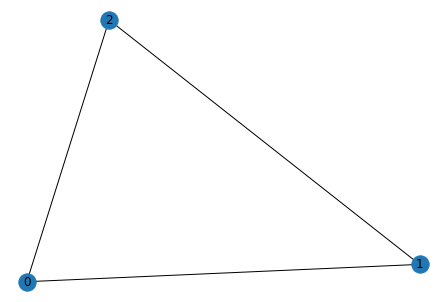

In [177]:
import networkx as nx
nx_graph = nx.from_numpy_array(a)
nx.draw(nx_graph,with_labels=True)
#nx_graph.get_edge_data(0, 1)
nx_graph.edges(data=True)

In [175]:
scores = nx.pagerank(nx_graph)

In [176]:
scores

{0: 0.39415197276929115, 1: 0.3576095966859351, 2: 0.24823843054477385}

In [169]:
sorted((scores[i] for i in scores),reverse=True)

[0.39415197276929115, 0.3576095966859351, 0.24823843054477385]

In [11]:
from word import infer_spaces as inf

cocaine marijuana shrooms porn child porno weed brown sugar coke


In [184]:
inf('cocainemarijuanashroomspornchildpornoweedbrownsugarcoke')

'cocaine marijuana shrooms porn child porno weed brown sugar coke'

In [3]:
new_df = pd.read_csv("pre-pro.csv")
len(new_df)

890

In [4]:
from nltk.tokenize import sent_tokenize
sentences = []
for s in new_df['content']:
  sentences.append(sent_tokenize(s))

sentences = [y for x in sentences for y in x]

In [5]:
len(sentences)

41078

In [6]:
sentences[0]

'\ufeffWe buy Bitcoin at a price that is 25% above the market priceENABLE JAVA SCRIPT FOR FUNCTIONALITY!!'

In [7]:
word_embeddings = {}
f = open('glove.6B\glove.6B.100d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    word_embeddings[word] = coefs
f.close()

In [8]:
from nltk.corpus import stopwords
clean_sentences = pd.Series(sentences).str.replace("[^a-zA-Z]", " ")
clean_sentences = [s.lower() for s in clean_sentences]

In [9]:
clean_sentences[0]

' we buy bitcoin at a price that is     above the market priceenable java script for functionality  '

In [12]:
l=[inf(i) for i in clean_sentences[0].split()]
l=' '.join(l)
l

'we buy bitcoin at a price that is above the market price enable java script for functionality'

In [13]:
stop_words = stopwords.words('english')
def remove_stopwords(sen):
    sen_new = " ".join([i for i in sen if i not in stop_words])
    return sen_new
clean_sentences = [remove_stopwords(r.split()) for r in clean_sentences]
clean_sentences[0]

'buy bitcoin price market priceenable java script functionality'

In [14]:
sentence_vectors = []
for i in clean_sentences:
  if len(i) != 0:
    v = sum([word_embeddings.get(w, np.zeros((100,))) for w in i.split()])/(len(i.split())+0.001)
  else:
    v = np.zeros((100,))
  sentence_vectors.append(v)

In [15]:
len(sentence_vectors)

41078

In [16]:
len(sentence_vectors[0])

100

In [17]:
import time
sim_mat = np.zeros([len(sentences), len(sentences)])
from sklearn.metrics.pairwise import cosine_similarity
st=time.time()
for i in range(len(sentences)):
  for j in range(len(sentences)):
    if i != j:
      if i<j:
        sim_mat[i][j] = cosine_similarity(sentence_vectors[i].reshape(1,100), sentence_vectors[j].reshape(1,100))[0,0]
      else:
        sim_mat[i][j]=sim_mat[j][i]
  if i%1000==0:
    print(i)
en=time.time()
en-st

0
1000
2000
3000
4000
5000


KeyboardInterrupt: 

In [ ]:
import networkx as nx
nx_graph = nx.from_numpy_array(sim_mat)
scores = nx.pagerank(nx_graph)

In [ ]:
ranked_sentences = sorted(((scores[i],s) for i,s in enumerate(sentences)), reverse=True)

In [ ]:
for i in range(10):
  print(ranked_sentences[i][1]+'\n')